In [ ]:
pip install seaborn pandas matplotlib

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import numpy as np

exp_json = "./experiment-20260218.json"

methods = ["bruteforce", "dfs", "hillclimb", "buildingwalk"]

df = pd.read_json(exp_json)
df.to_pickle("experiment.pickle")
df.to_csv("experiment-20260218.csv")
#print("Experiment:")
#print(df)

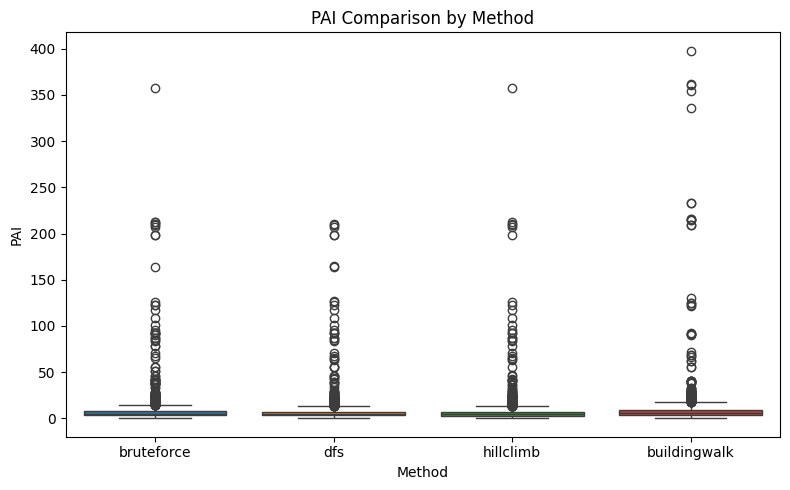

In [22]:
plt.figure(figsize=(8, 5))

sns.boxplot(
    data=df,
    x="method",
    y="pai",
    order=methods,
    hue="method",
    hue_order=methods,
)
#plt.yscale("log")
plt.xlabel("Method")
plt.ylabel("PAI")
plt.title("PAI Comparison by Method")

plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import friedmanchisquare

# Example: subset for radius=50, decay=linear
df_subset = df[(df["radius"]==50) & (df["activation_function"]=="linear")]

# Number runs per method
df_subset["run"] = df_subset.groupby("method").cumcount()

# Pivot table
pivot_table = df_subset.pivot(index="run", columns="method", values="best_score").dropna()

# Friedman test
stat, p = friedmanchisquare(*[pivot_table[col] for col in pivot_table.columns])
print(stat, p)

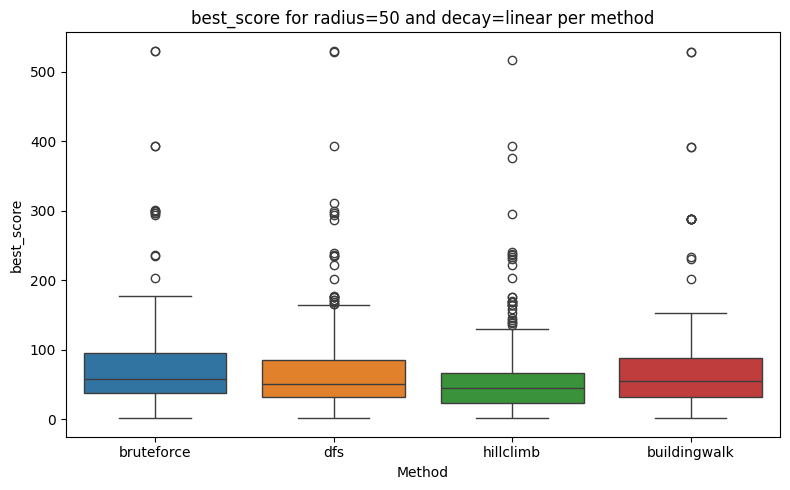

434.4056285178236 7.796513075502932e-94


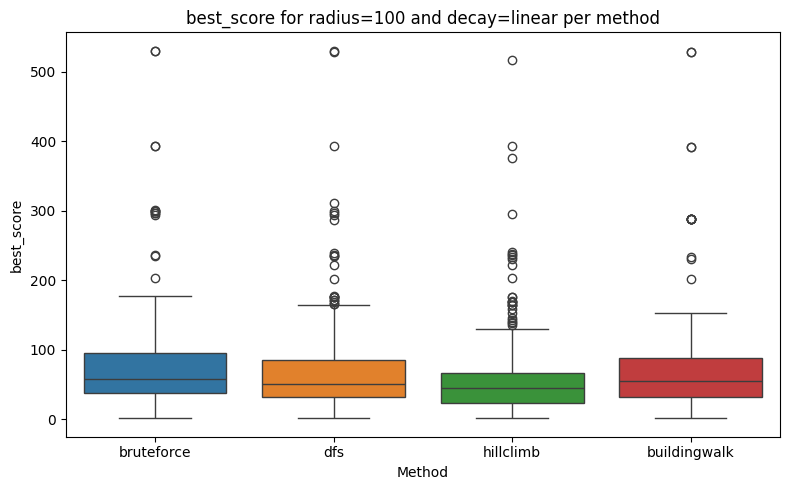

434.4056285178236 7.796513075502932e-94


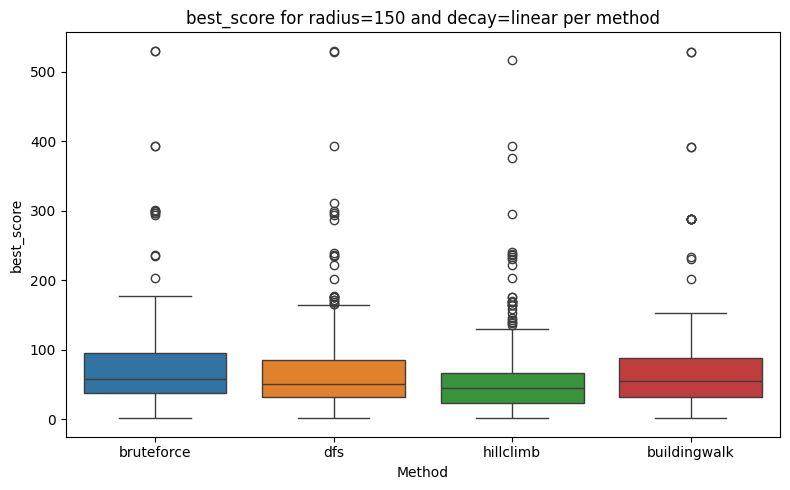

434.4056285178236 7.796513075502932e-94


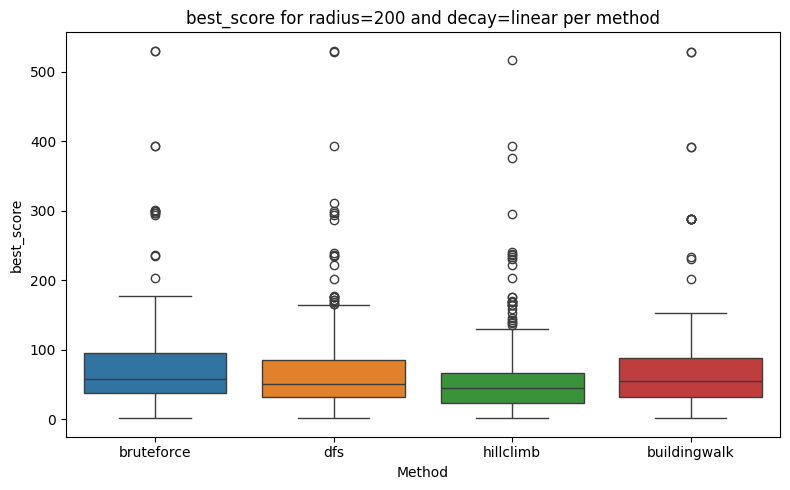

434.4056285178236 7.796513075502932e-94


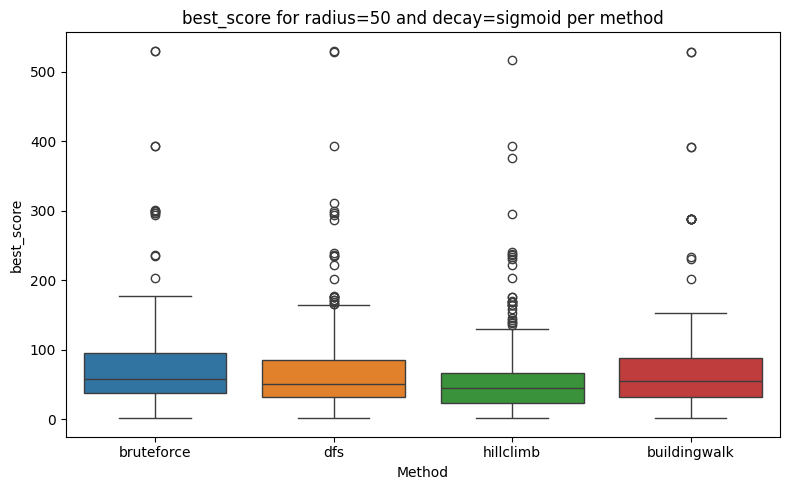

434.4056285178236 7.796513075502932e-94


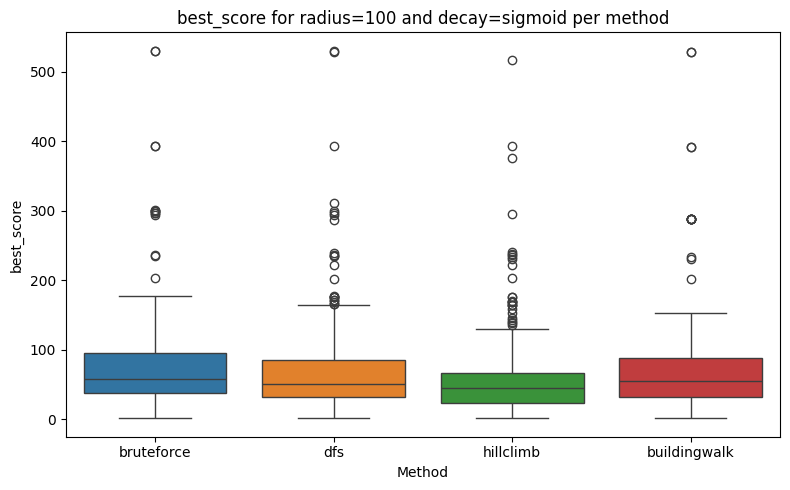

434.4056285178236 7.796513075502932e-94


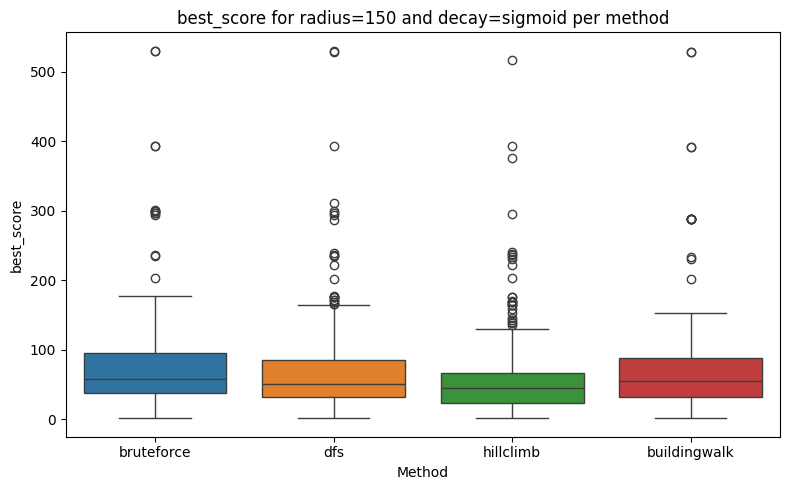

434.4056285178236 7.796513075502932e-94


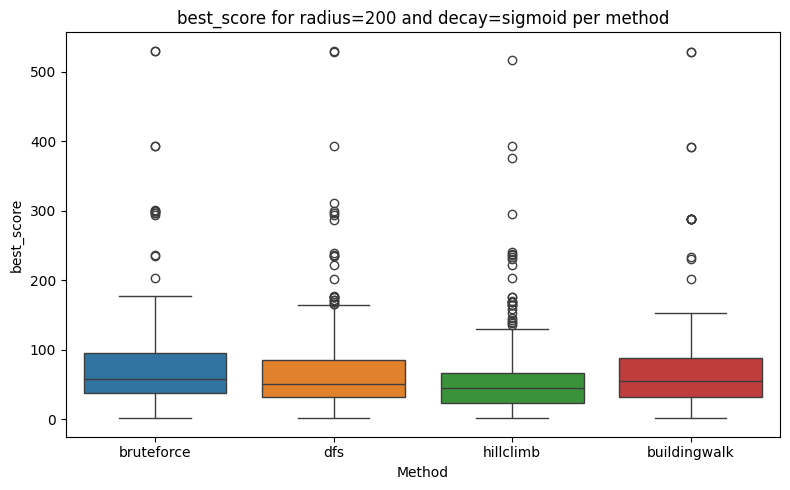

434.4056285178236 7.796513075502932e-94


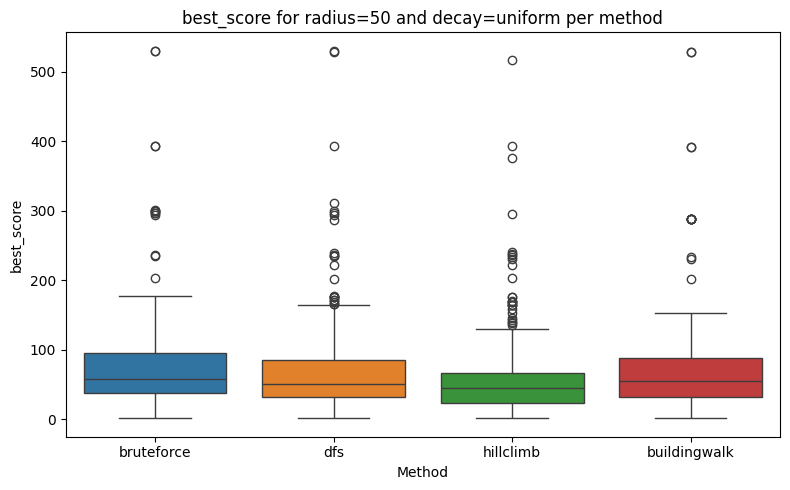

434.4056285178236 7.796513075502932e-94


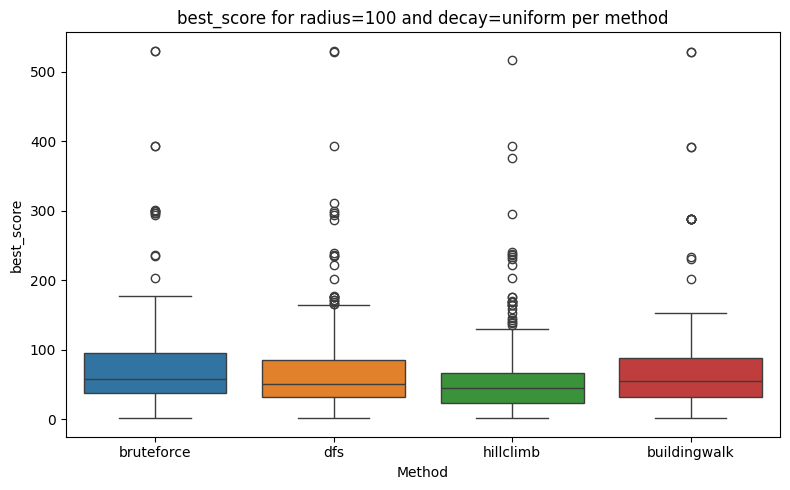

434.4056285178236 7.796513075502932e-94


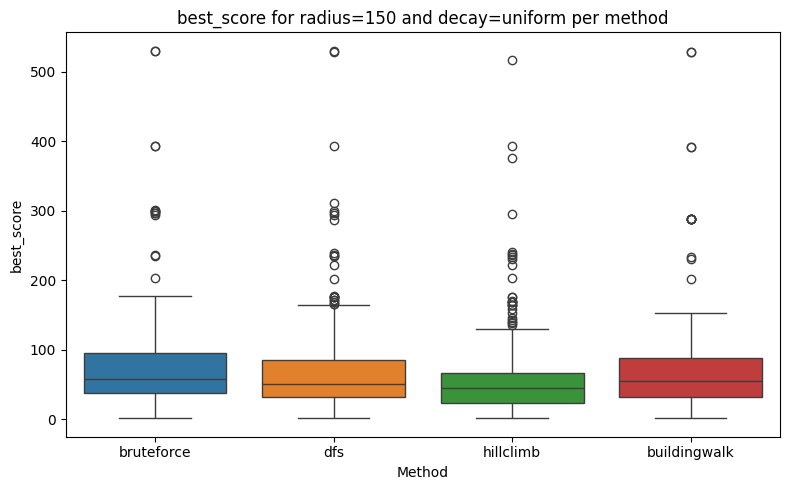

434.4056285178236 7.796513075502932e-94


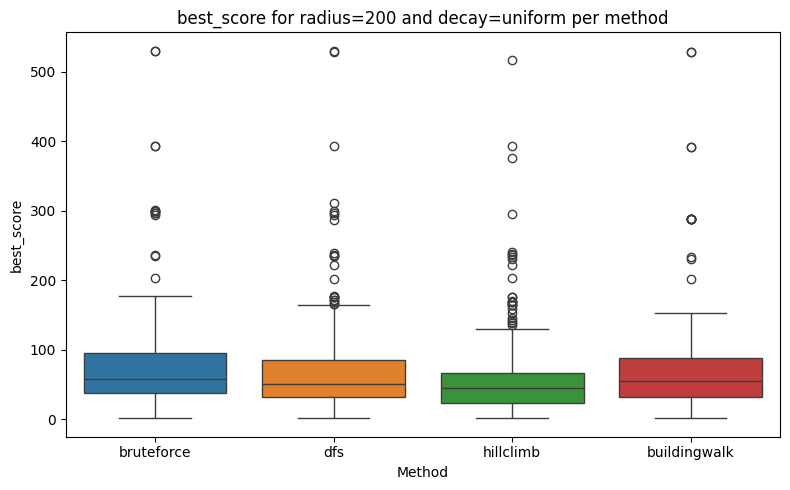

434.4056285178236 7.796513075502932e-94


In [25]:
from scipy.stats import friedmanchisquare

metric = "best_score"
decay_functions = list(set(df.activation_function))
df_subset = df[(df["radius"] == current_radius) & (df["activation_function"] == current_decay)]

for current_decay in decay_functions:
    for current_radius in sorted(list(set(df.radius))):
        plt.figure(figsize=(8, 5))
        sns.boxplot(
            data=df_subset,
            x="method",
            y=metric,
            order=methods,
            hue="method",
            hue_order=methods,
        )
        #plt.yscale("log")
        plt.xlabel("Method")
        plt.ylabel(metric)
        plt.title(f"{metric} for radius={current_radius} and decay={current_decay} per method")
        
        plt.tight_layout()
        plt.show()

        df_subset["run"] = df_subset.groupby("method").cumcount()
        # Pivot table
        pivot_table = df_subset.pivot(index="run", columns="method", values=metric).dropna()
        # Friedman test
        stat, p = friedmanchisquare(*[pivot_table[col] for col in pivot_table.columns])
        print(stat, p)